# Emotions Dataset For NLP

## About Dataset
Context
Collection of documents and its emotions, It helps greatly in NLP Classification tasks

## Content
List of documents with emotion flag, Dataset is split into train, test & validation for building the machine learning model

## Example
i feel like I am still looking at a blank canvas blank pieces of paper;sadness

## Acknowledgements
Elvis Saravia, Hsien-Chi Toby Liu, Yen-Hao Huang, Junlin Wu, and Yi-Shin Chen. 2018. CARER: Contextualized Affect Representations for Emotion Recognition. In Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing, pages 3687–3697, Brussels, Belgium. Association for Computational Linguistics.

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?select=val.txt

In [67]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow.keras.backend as K
import itertools
from functools import partial

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
def open_txt(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        lines = [line.replace("\n", "") for line in lines]

    df = pd.DataFrame(lines, columns=["emotions"])
    df['emotions'] = df['emotions'].str.split(';')

    return pd.DataFrame(df["emotions"].to_list(), columns=['text', 'emotion'])


In [69]:
df_train = open_txt("train/train.txt")
df_val = open_txt("val/val.txt")
df_test = open_txt("test/test.txt")

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [71]:
df_train.emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [72]:
df_train.sample(10)

,text,emotion
553,i write him when something big has happened li...,joy
1530,i can wear anything and not feel bad,sadness
6678,im one of girl who feel insecure about herself...,fear
11745,i feel them gnawing out holes all throughout m...,joy
7685,im still not sure why reilly feels the need to...,surprise
5710,i feel so much pain inside for their aching he...,sadness
2363,i mention this one doesn t feel fake,sadness
13082,i just didnt feel inspired,joy
7994,i only have a few hours of sleep i still feel ...,joy
6921,i feel like a hot mess,love


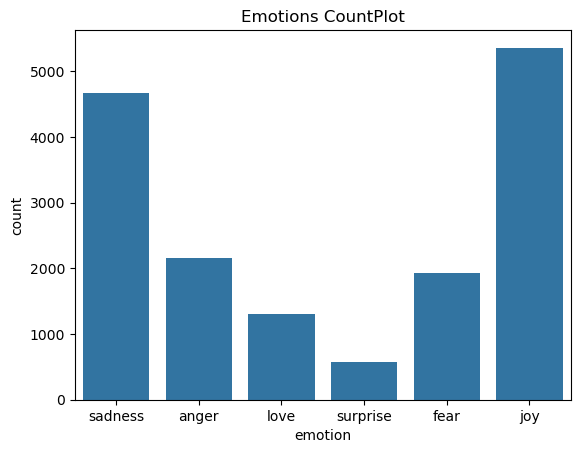

In [77]:
plt.title("Emotions CountPlot")
sns.countplot(data=df_train, x="emotion")
plt.show()